In [ ]:
# import library
from skimage import io, color,filters, viewer, exposure , color, transform, feature, draw, img_as_float, data
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageOps
import matplotlib.pylab as plt
from google.colab import files


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Viewer requires Qt
  """Entry point for launching an IPython kernel.


In [ ]:
# upload citra yang digunakan
uploaded = files.upload()
filename = list(uploaded.keys())[0]


Saving lena.jpg to lena.jpg


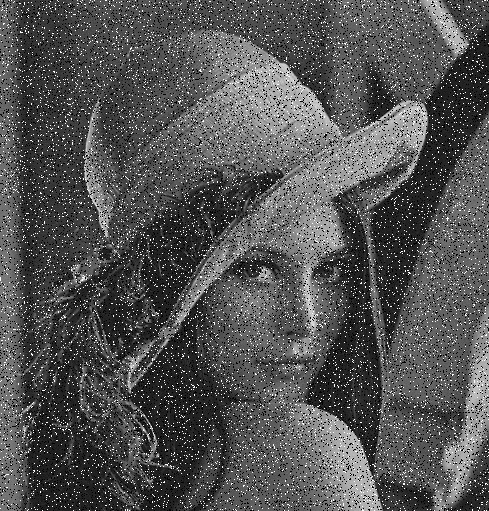

In [ ]:
# menampilkan citra tadi yang sudah di upload
im2 = Image.open(filename)

display(im2)

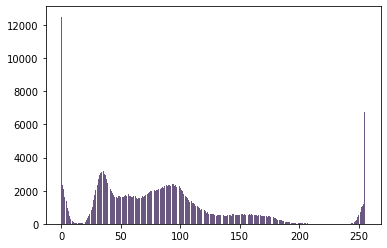

In [ ]:
# menghitung histogram dari citra
pl = im2.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

In [ ]:
# memperbaiki citra menggunakan median filter
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final





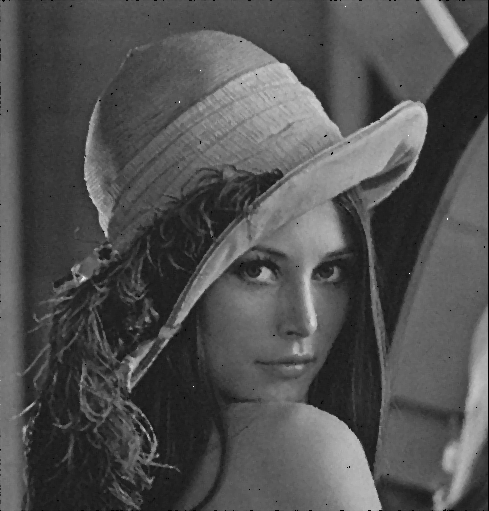

In [ ]:
# menampilkan citra yang sudah diperbaiki dan dikonvert ke RGB
im = Image.open(filename)
im = im.convert("L")
arr = np.array(im)
removed_noise = median_filter(arr, 3) 
im = Image.fromarray(removed_noise)
if im.mode != 'RGB':
    im = im.convert('RGB')
display(im)

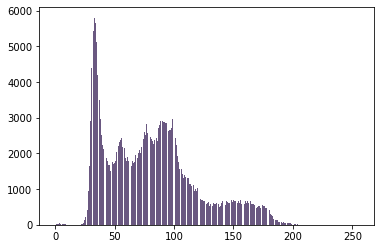

In [ ]:
# Menampilkan hisogram dari citra
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

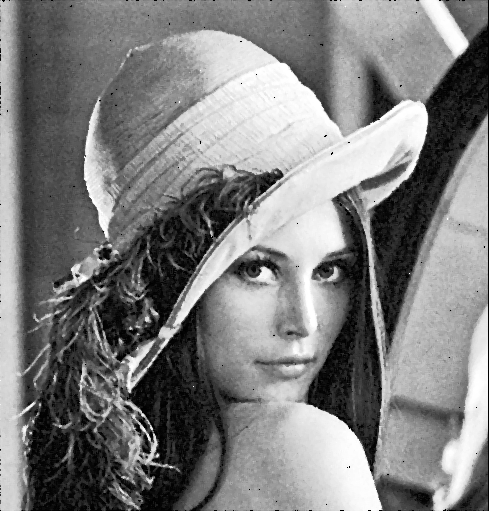

In [ ]:
# mengekualisasi atau equalization citra yang tadi
imEkual = ImageOps.equalize(im, mask = None)
display(imEkual)

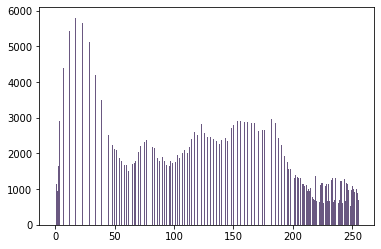

In [ ]:
# menampilkan histogram dari citra tadi yang sudah di equalization
pl = imEkual.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()